In [29]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/forestfires.csv")

In [31]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [32]:
# Initial Exploration
print(df.head())
print(df.info())
print(df.describe())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null

In [33]:
# Label encoding preview for 'month'
month_categories = pd.Categorical(df['month']).categories
month_mapping = {month: idx for idx, month in enumerate(month_categories)}
print("📅 Month Encoding:")
print(month_mapping)

# Label encoding preview for 'day'
day_categories = pd.Categorical(df['day']).categories
day_mapping = {day: idx for idx, day in enumerate(day_categories)}
print("\n🗓️ Day Encoding:")
print(day_mapping)


📅 Month Encoding:
{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}

🗓️ Day Encoding:
{'fri': 0, 'mon': 1, 'sat': 2, 'sun': 3, 'thu': 4, 'tue': 5, 'wed': 6}


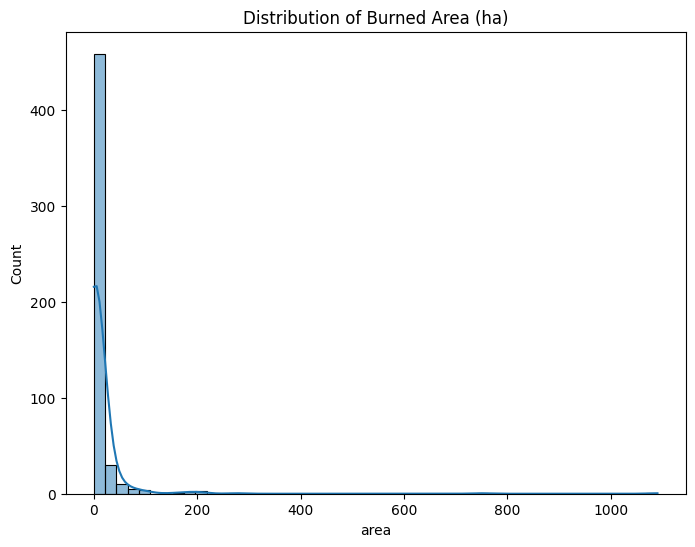

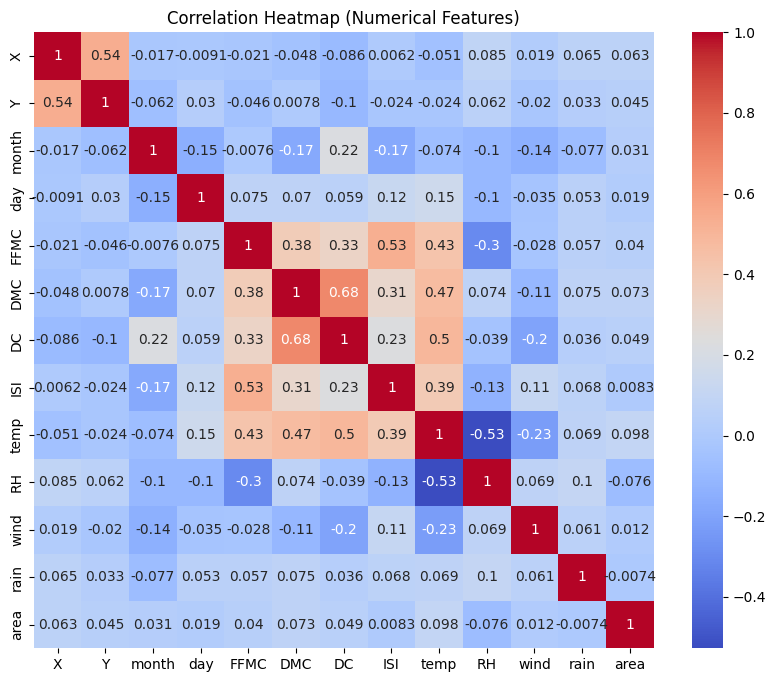

In [34]:
# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['area'], bins=50, kde=True)
plt.title("Distribution of Burned Area (ha)")
plt.show()

# Fix categorical columns for correlation heatmap
df_corr = df.copy()
df_corr['month'] = pd.Categorical(df_corr['month']).codes
df_corr['day'] = pd.Categorical(df_corr['day']).codes

# Plot correlation heatmap only for numerical data
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [37]:
# Feature Engineering
df['area'] = np.log1p(df['area'])  # Log transform to reduce skew
df['month'] = pd.Categorical(df['month']).codes
df['day'] = pd.Categorical(df['day']).codes


In [38]:
# Label encoding preview for 'month'
month_categories = pd.Categorical(df['month']).categories
month_mapping = {month: idx for idx, month in enumerate(month_categories)}
print("📅 Month Encoding:")
print(month_mapping)

# Label encoding preview for 'day'
day_categories = pd.Categorical(df['day']).categories
day_mapping = {day: idx for idx, day in enumerate(day_categories)}
print("\n🗓️ Day Encoding:")
print(day_mapping)


📅 Month Encoding:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}

🗓️ Day Encoding:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [39]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [9]:
# Outlier removal (optional - here removing extreme log(area) values)
df = df[df['area'] < 6]  # area < log(400)

In [10]:
# Rename columns in the DataFrame
df.rename(columns={
    'FFMC': 'Fine Fuel Moisture Code (FFMC)',
    'DMC': 'Duff Moisture Code (DMC)',
    'DC': 'Drought Code (DC)',
    'ISI': 'Initial Spread Index (ISI)'
}, inplace=True)

# Check updated columns
print(df.columns)


Index(['X', 'Y', 'month', 'day', 'Fine Fuel Moisture Code (FFMC)',
       'Duff Moisture Code (DMC)', 'Drought Code (DC)',
       'Initial Spread Index (ISI)', 'temp', 'RH', 'wind', 'rain', 'area'],
      dtype='object')


<ipython-input-10-5f166f8d60cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [11]:
df

,X,Y,month,day,Fine Fuel Moisture Code (FFMC),Duff Moisture Code (DMC),Drought Code (DC),Initial Spread Index (ISI),temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [12]:
df.rename(columns={
    'RH': 'Rain Fall'
}, inplace=True)

<ipython-input-12-28a4b5f1e1ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [14]:
df.rename(columns={
    'Rain Fall':'Relative Humidity (RH)'
}, inplace=True)

<ipython-input-14-52c223622446>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [15]:
df

,X,Y,month,day,Fine Fuel Moisture Code (FFMC),Duff Moisture Code (DMC),Drought Code (DC),Initial Spread Index (ISI),temp,Relative Humidity (RH),wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [16]:
# Define features and target
X = df.drop("area", axis=1)
y = df["area"]

In [17]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train.shape

(412, 12)

In [20]:
X_test.shape

(103, 12)

In [21]:
y_train.shape

(412,)

In [22]:
y_test.shape

(103,)

In [23]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)

print("\n📊 Evaluation Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")


📊 Evaluation Metrics:
MAE: 1.1944
MSE: 1.9838
RMSE: 1.4085
R2 Score: -0.1074


In [25]:
# Save the model and scaler
joblib.dump(model, "forest_fire_model.pkl")
joblib.dump(scaler, "forest_fire_scaler.pkl")

print("\n✅ Model and scaler saved for Django integration.")


✅ Model and scaler saved for Django integration.


In [26]:
import joblib
import numpy as np

# Load the trained model and scaler
model = joblib.load("forest_fire_model.pkl")
scaler = joblib.load("forest_fire_scaler.pkl")

In [27]:
# Example custom input (replace with your values)
# Format: [X, Y, month_code, day_code, temp, RH, wind, rain, FFMC, DMC, DC, ISI]
custom_data = np.array([[7,5,7,0,88.6,26.2,94.3,5.1,8.2,51,6.7,0.0]])

# Scale the input
custom_data_scaled = scaler.transform(custom_data)

# Predict
log_area_pred = model.predict(custom_data_scaled)[0]

# Convert back from log scale to actual area
predicted_area = np.expm1(log_area_pred)

print(f"🔥 Predicted Burned Area: {predicted_area:.2f} hectares")


🔥 Predicted Burned Area: 3.88 hectares


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
